In [1]:
using Plots;
using CSV;
using DataFrames;

data_path = "..//data//";
save_path = "..//..//LATEX//image//";

if isdir(save_path) != true
    mkpath(save_path);
end

dt = 0.005;
x = Vector(-10: 0.1: 10);
t = Vector(0: dt: 5);

c = [0.1, 0.5, 1.0, 5.0, 10.0];
IC_name = ["Triangle", "Step"];
c_name = "c=" .* string.(c);

colors = [:blue, :red, :green, :purple, :yellow, :black];

# SingleWave

## 时间演化特性

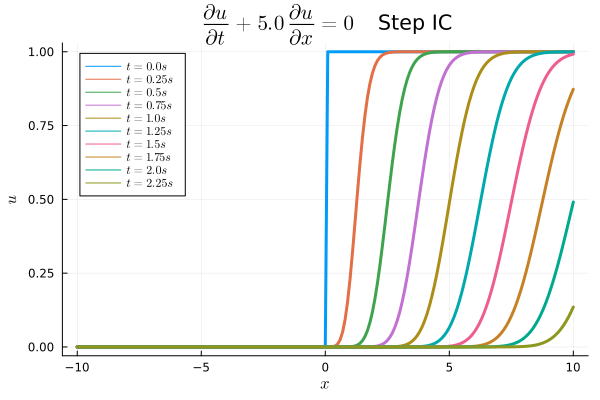

In [2]:
k = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "SingleWave//implicit_backward//$(IC_name[2])_$(c_name[4]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=3
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + $(c[4])\\frac{\\partial u}{\\partial x}=0\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "SingleWave//evolution_time_$(IC_name[2]).pdf");
plot(p)

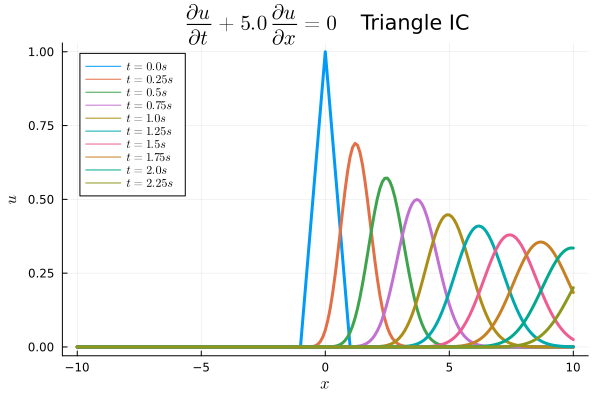

In [3]:
k = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "SingleWave//implicit_backward//$(IC_name[1])_$(c_name[4]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=3
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + $(c[4])\\frac{\\partial u}{\\partial x}=0\\quad\$ $(IC_name[1]) IC");

savefig(p, save_path * "SingleWave//evolution_time_$(IC_name[1]).pdf");
plot(p)

## 参数$c$作用

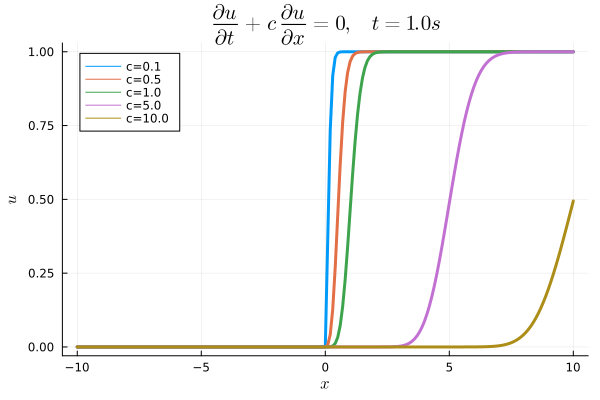

In [4]:
k = 201
data = zeros(length(c), length(x));
for i in 1:length(c)
    data[i, :] = Matrix( CSV.read(data_path * "SingleWave//implicit_backward//$(IC_name[2])_$(c_name[i]).csv", DataFrame) )[k, :];
end

p = plot()
for i = 1:length(c)
    plot!(
        x, data[i, :],
        label=c_name[i],
        legend=:topleft,
        lw=3
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + c\\frac{\\partial u}{\\partial x}=0, \\quad t=$(t[k]) s\$");

savefig(p, save_path * "SingleWave//function_of_c_$(IC_name[2]).pdf")
plot(p)

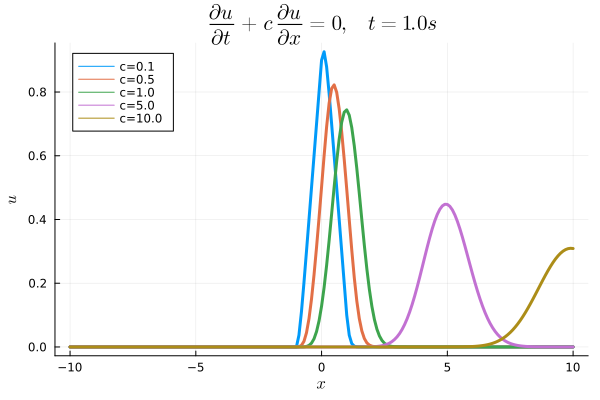

In [5]:
k = 201
data = zeros(length(c), length(x));
for i in 1:length(c)
    data[i, :] = Matrix( CSV.read(data_path * "SingleWave//implicit_backward//$(IC_name[1])_$(c_name[i]).csv", DataFrame) )[k, :];
end

p = plot()
for i = 1:length(c)
    plot!(
        x, data[i, :],
        label=c_name[i],
        legend=:topleft,
        lw=3
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + c\\frac{\\partial u}{\\partial x}=0, \\quad t=$(t[k]) s\$");

savefig(p, save_path * "SingleWave//function_of_c_$(IC_name[1]).pdf")
plot(p)

## 显式隐式比较

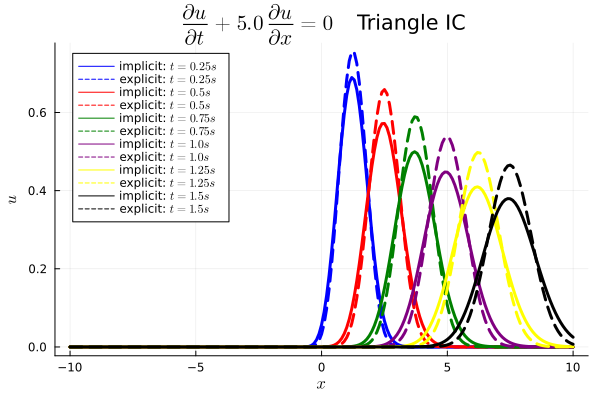

In [6]:
k = [50, 100, 150, 200, 250, 300] .+ 1;
data1 = zeros(length(k), length(x));
data2 = zeros(length(k), length(x));
for i in 1:length(k)
    data1[i, :] = Matrix( CSV.read(data_path * "SingleWave//implicit_backward//$(IC_name[1])_$(c_name[4]).csv", DataFrame) )[k[i], :];
    data2[i, :] = Matrix( CSV.read(data_path * "SingleWave//explicit_backward//$(IC_name[1])_$(c_name[4]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data1[i, :],
        label="implicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=3,
        color=colors[i]
    )
    plot!(
        x, data2[i, :],
        label="explicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=3,
        color=colors[i],
        linestyle=:dash
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + $(c[4])\\frac{\\partial u}{\\partial x}=0\\quad\$ $(IC_name[1]) IC");

savefig(p, save_path * "SingleWave//backward_ie_comparison_Triangle.pdf");
plot(p)

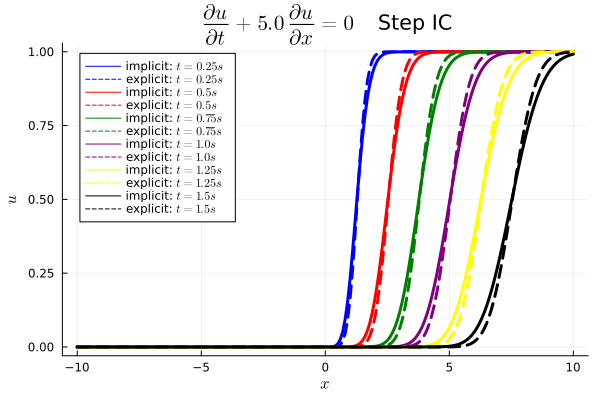

In [7]:
k = [50, 100, 150, 200, 250, 300] .+ 1;
data1 = zeros(length(k), length(x));
data2 = zeros(length(k), length(x));
for i in 1:length(k)
    data1[i, :] = Matrix( CSV.read(data_path * "SingleWave//implicit_backward//$(IC_name[2])_$(c_name[4]).csv", DataFrame) )[k[i], :];
    data2[i, :] = Matrix( CSV.read(data_path * "SingleWave//explicit_backward//$(IC_name[2])_$(c_name[4]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data1[i, :],
        label="implicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=3,
        color=colors[i]
    )
    plot!(
        x, data2[i, :],
        label="explicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=3,
        color=colors[i],
        linestyle=:dash
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + $(c[4])\\frac{\\partial u}{\\partial x}=0\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "SingleWave//backward_ie_comparison_Step.pdf");
plot(p)

## 中心格式不稳定

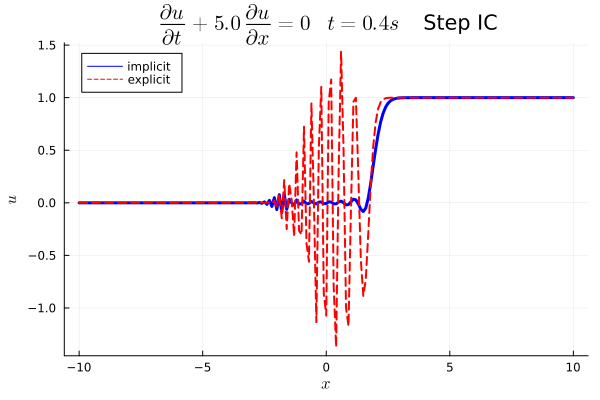

In [8]:
k = 81
data1 = zeros(length(x));
data2 = zeros(length(x));
data3 = zeros(length(x));
data4 = zeros(length(x));

data1 = Matrix( CSV.read(data_path * "SingleWave//implicit_central//$(IC_name[2])_$(c_name[4]).csv", DataFrame) )[k, :];
data2 = Matrix( CSV.read(data_path * "SingleWave//explicit_central//$(IC_name[2])_$(c_name[4]).csv", DataFrame) )[k, :];
data3 = Matrix( CSV.read(data_path * "SingleWave//implicit_central//$(IC_name[1])_$(c_name[4]).csv", DataFrame) )[k, :];
data4 = Matrix( CSV.read(data_path * "SingleWave//explicit_central//$(IC_name[1])_$(c_name[4]).csv", DataFrame) )[k, :];

p = plot()

plot!(
    x, 
    data1,
    lw=3,
    color=:blue,
    label="implicit",
    legend=:topleft
)

plot!(
    x, 
    data2,
    lw=2,
    color=:red,
    label="explicit",
    legend=:topleft,
    linestyle=:dash
)

xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + $(c[4])\\frac{\\partial u}{\\partial x}=0\\quad t=$(t[k])s\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "SingleWave//central_unstable_Step.pdf")
plot(p)

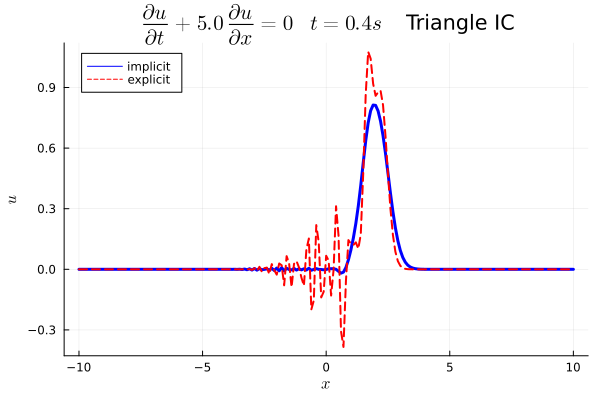

In [9]:
p = plot()

plot!(
    x, 
    data3,
    lw=3,
    color=:blue,
    label="implicit",
    legend=:topleft
)

plot!(
    x, 
    data4,
    lw=2,
    color=:red,
    label="explicit",
    legend=:topleft,
    linestyle=:dash
)

xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + $(c[4])\\frac{\\partial u}{\\partial x}=0\\quad t=$(t[k])s\\quad\$ $(IC_name[1]) IC");

savefig(p, save_path * "SingleWave//central_unstable_Triangle.pdf")
plot(p)

## 向前格式不稳定

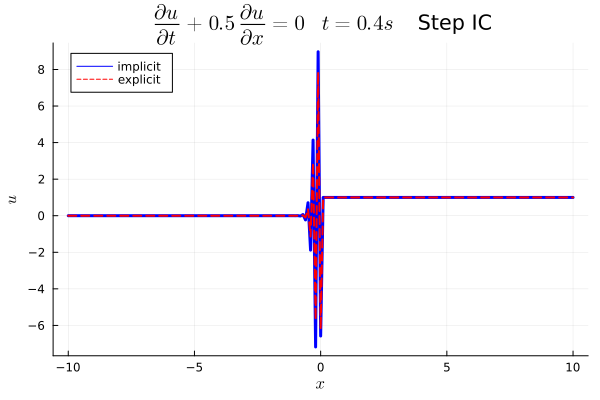

In [10]:
k = 81
data1 = zeros(length(x));
data2 = zeros(length(x));
data3 = zeros(length(x));
data4 = zeros(length(x));

data1 = Matrix( CSV.read(data_path * "SingleWave//implicit_forward//$(IC_name[2])_$(c_name[2]).csv", DataFrame) )[k, :];
data2 = Matrix( CSV.read(data_path * "SingleWave//explicit_forward//$(IC_name[2])_$(c_name[2]).csv", DataFrame) )[k, :];
data3 = Matrix( CSV.read(data_path * "SingleWave//implicit_forward//$(IC_name[1])_$(c_name[2]).csv", DataFrame) )[k, :];
data4 = Matrix( CSV.read(data_path * "SingleWave//explicit_forward//$(IC_name[1])_$(c_name[2]).csv", DataFrame) )[k, :];

p = plot()

plot!(
    x, 
    data1,
    lw=3,
    color=:blue,
    label="implicit",
    legend=:topleft
)

plot!(
    x, 
    data2,
    lw=2,
    color=:red,
    label="explicit",
    legend=:topleft,
    linestyle=:dash
)

xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + $(c[2])\\frac{\\partial u}{\\partial x}=0\\quad t=$(t[k])s\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "SingleWave//forward_unstable_Step.pdf")
plot(p)

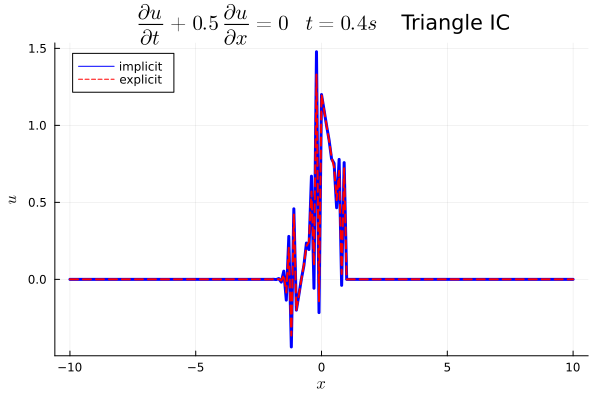

In [11]:
p = plot()

plot!(
    x, 
    data3,
    lw=3,
    color=:blue,
    label="implicit",
    legend=:topleft
)

plot!(
    x, 
    data4,
    lw=2,
    color=:red,
    label="explicit",
    legend=:topleft,
    linestyle=:dash
)

xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + $(c[2])\\frac{\\partial u}{\\partial x}=0\\quad t=$(t[k])s\\quad\$ $(IC_name[1]) IC");

savefig(p, save_path * "SingleWave//forward_unstable_Triangle.pdf")
plot(p)

# Heat

## 时间演化特性

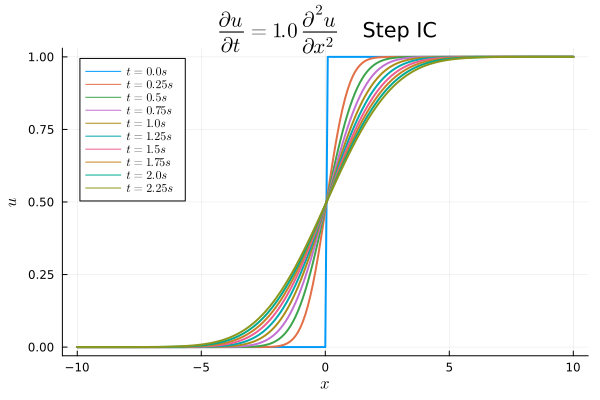

In [12]:
k = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "Heat//implicit_bc1//$(IC_name[2])_$(c_name[3]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=2
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} = $(c[3])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "Heat//evolution_time_$(IC_name[2]).pdf");
plot(p)

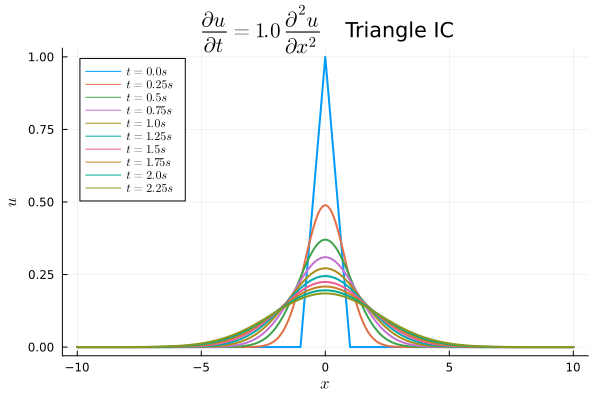

In [13]:
k = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "Heat//implicit_bc1//$(IC_name[1])_$(c_name[3]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=2
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} = $(c[3])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[1]) IC");

savefig(p, save_path * "Heat//evolution_time_$(IC_name[1]).pdf");
plot(p)

## 参数$\alpha$作用

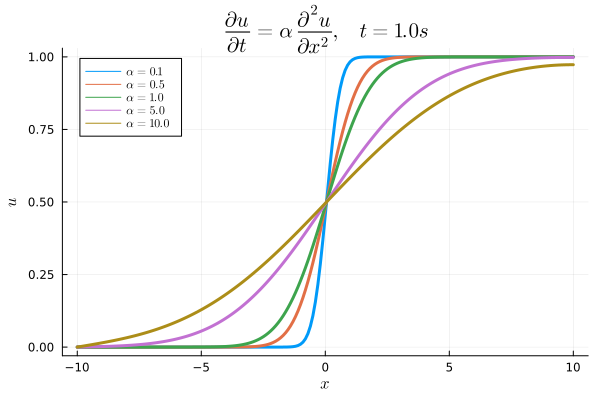

In [14]:
k = 201
data = zeros(length(c), length(x));
for i in 1:length(c)
    data[i, :] = Matrix( CSV.read(data_path * "Heat//implicit_bc1//$(IC_name[2])_$(c_name[i]).csv", DataFrame) )[k, :];
end

p = plot()
for i = 1:length(c)
    plot!(
        x, data[i, :],
        label="\$\\alpha=$(c[i])\$",
        legend=:topleft,
        lw=3
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} = \\alpha\\frac{\\partial^2 u}{\\partial x^2}, \\quad t=$(t[k]) s\$");

savefig(p, save_path * "Heat//function_of_c_$(IC_name[2]).pdf")
plot(p)

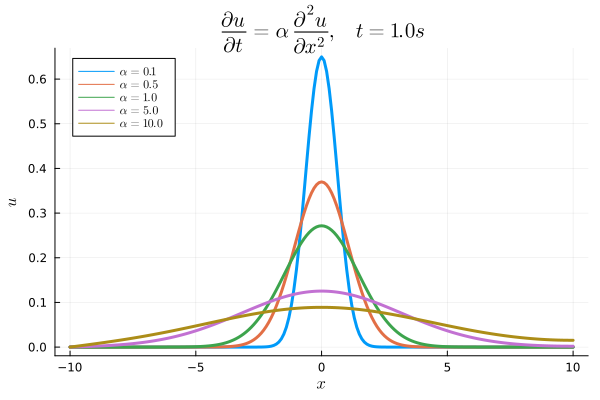

In [15]:
k = 201
data = zeros(length(c), length(x));
for i in 1:length(c)
    data[i, :] = Matrix( CSV.read(data_path * "Heat//implicit_bc1//$(IC_name[1])_$(c_name[i]).csv", DataFrame) )[k, :];
end

p = plot()
for i = 1:length(c)
    plot!(
        x, data[i, :],
        label="\$\\alpha=$(c[i])\$",
        legend=:topleft,
        lw=3
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} = \\alpha\\frac{\\partial^2 u}{\\partial x^2}, \\quad t=$(t[k]) s\$");

savefig(p, save_path * "Heat//function_of_c_$(IC_name[1]).pdf")
plot(p)

## 显式隐式比较

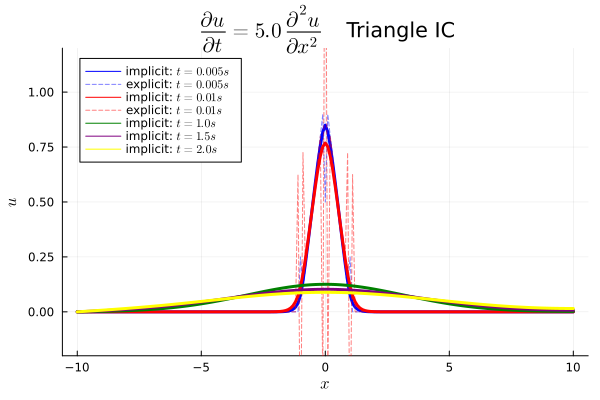

In [16]:
k = [1, 2, 200, 300, 400] .+ 1;
data1 = zeros(length(k), length(x));
data2 = zeros(length(k), length(x));
for i in 1:length(k)
    data1[i, :] = Matrix( CSV.read(data_path * "Heat//implicit_bc1//$(IC_name[1])_$(c_name[4]).csv", DataFrame) )[k[i], :];
    data2[i, :] = Matrix( CSV.read(data_path * "Heat//explicit_bc1//$(IC_name[1])_$(c_name[4]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data1[i, :],
        label="implicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=3,
        color=colors[i]
    )
    if i>2
        continue
    end
    plot!(
        x, data2[i, :],
        label="explicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=1,
        color=colors[i],
        linestyle=:dash,
        alpha=0.5,
        ylims=[-0.2, 1.2]
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} = $(c[4])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[1]) IC");

savefig(p, save_path * "Heat//bc1_ie_comparison_$(IC_name[1]).pdf");
plot(p)

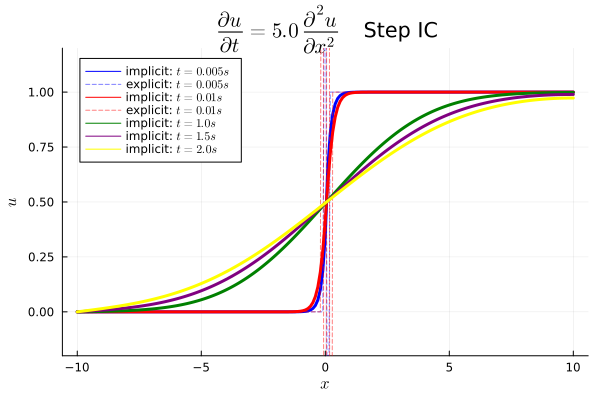

In [17]:
k = [1, 2, 200, 300, 400] .+ 1;
data1 = zeros(length(k), length(x));
data2 = zeros(length(k), length(x));
for i in 1:length(k)
    data1[i, :] = Matrix( CSV.read(data_path * "Heat//implicit_bc1//$(IC_name[2])_$(c_name[4]).csv", DataFrame) )[k[i], :];
    data2[i, :] = Matrix( CSV.read(data_path * "Heat//explicit_bc1//$(IC_name[2])_$(c_name[4]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data1[i, :],
        label="implicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=3,
        color=colors[i]
    )
    if i>2
        continue
    end
    plot!(
        x, data2[i, :],
        label="explicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=1,
        color=colors[i],
        linestyle=:dash,
        alpha=0.5,
        ylims=[-0.2, 1.2]
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} = $(c[4])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "Heat//bc1_ie_comparison_$(IC_name[2]).pdf");
plot(p)

## 第一类边界条件

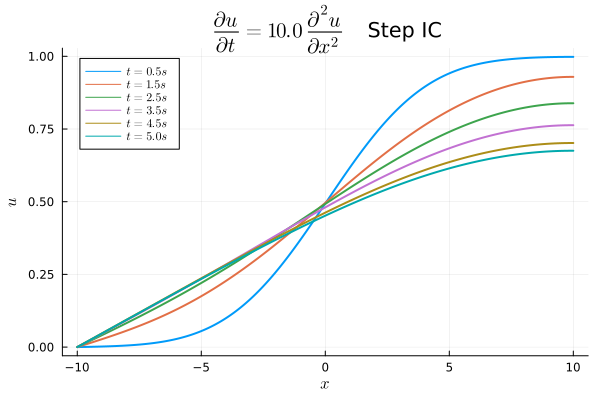

In [18]:
k = [100, 300, 500, 700, 900, 1000] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "Heat//implicit_bc1//$(IC_name[2])_$(c_name[5]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=2
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} = $(c[5])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "Heat//bc1_$(IC_name[2]).pdf");
plot(p)

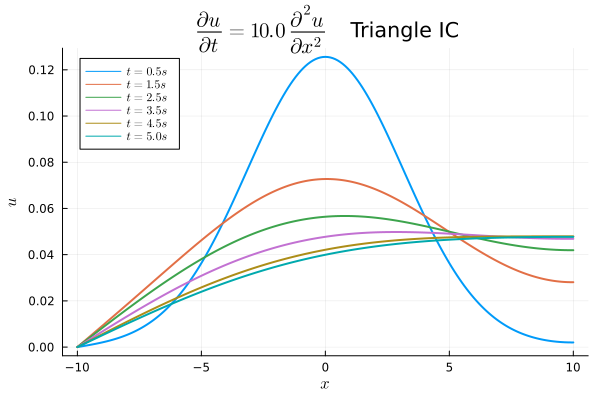

In [19]:
k = [100, 300, 500, 700, 900, 1000] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "Heat//implicit_bc1//$(IC_name[1])_$(c_name[5]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=2
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} = $(c[5])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[1]) IC");

savefig(p, save_path * "Heat//bc1_$(IC_name[1]).pdf");
plot(p)

## 第二类边界条件

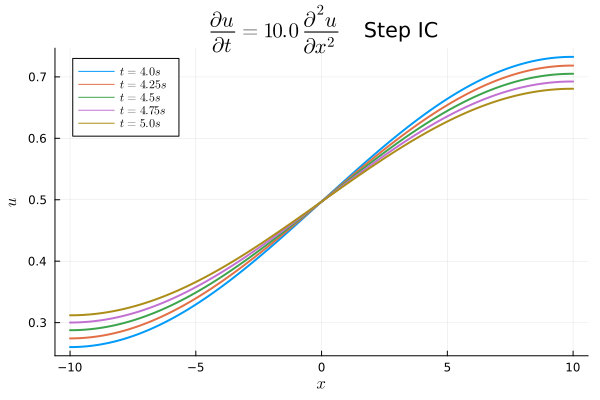

In [20]:
k = [800, 850, 900, 950, 1000] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "Heat//implicit_bc2//$(IC_name[2])_$(c_name[5]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=2
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} = $(c[5])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "Heat//bc2_$(IC_name[2]).pdf");
plot(p)

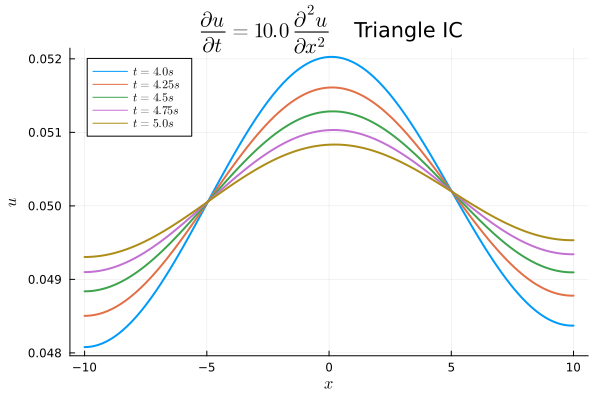

In [21]:
k = [800, 850, 900, 950, 1000] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "Heat//implicit_bc2//$(IC_name[1])_$(c_name[5]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=2
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} = $(c[5])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[1]) IC");

savefig(p, save_path * "Heat//bc2_$(IC_name[1]).pdf")
plot(p)

# Burgers

## 时间演化特性

In [22]:
nu_name = "nu=" .* string.(c)

5-element Vector{String}:
 "nu=0.1"
 "nu=0.5"
 "nu=1.0"
 "nu=5.0"
 "nu=10.0"

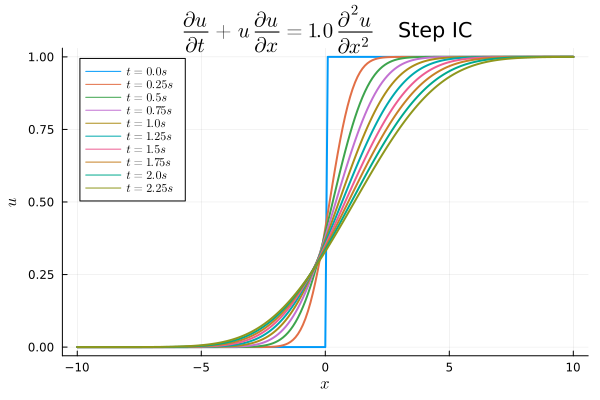

In [23]:
k = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "Burgers//implicit_bc1//$(IC_name[2])_$(nu_name[3]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=2
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + u\\frac{\\partial u}{\\partial x}= $(c[3])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "Burgers//evolution_time_$(IC_name[2]).pdf");
plot(p)

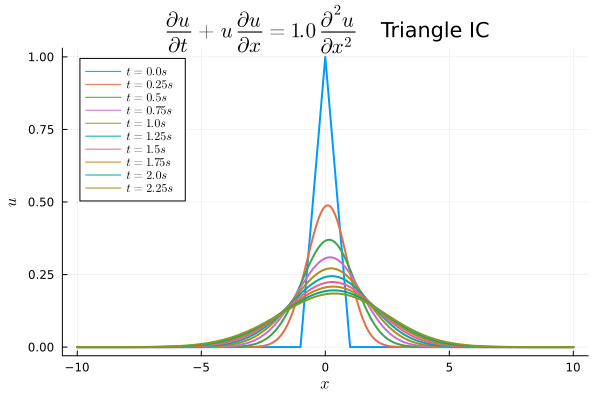

In [24]:
k = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "Burgers//implicit_bc1//$(IC_name[1])_$(nu_name[3]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=2
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + u\\frac{\\partial u}{\\partial x} = $(c[3])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[1]) IC");

savefig(p, save_path * "Burgers//evolution_time_$(IC_name[1]).pdf");
plot(p)

## 参数$\nu$作用

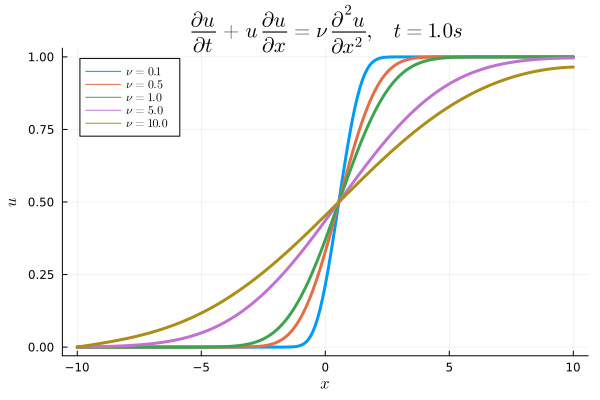

In [25]:
k = 201
data = zeros(length(c), length(x));
for i in 1:length(c)
    data[i, :] = Matrix( CSV.read(data_path * "Burgers//implicit_bc1//$(IC_name[2])_$(nu_name[i]).csv", DataFrame) )[k, :];
end

p = plot()
for i = 1:length(c)
    plot!(
        x, data[i, :],
        label="\$\\nu=$(c[i])\$",
        legend=:topleft,
        lw=3
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t}+ u\\frac{\\partial u}{\\partial x}= \\nu\\frac{\\partial^2 u}{\\partial x^2}, \\quad t=$(t[k]) s\$");

savefig(p, save_path * "Burgers//function_of_nu_$(IC_name[2]).pdf")
plot(p)

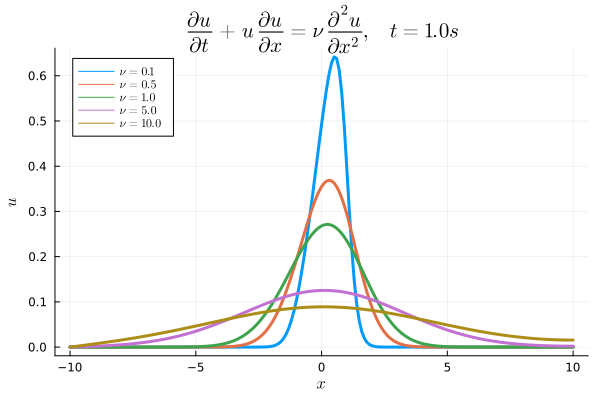

In [26]:
k = 201
data = zeros(length(c), length(x));
for i in 1:length(c)
    data[i, :] = Matrix( CSV.read(data_path * "Burgers//implicit_bc1//$(IC_name[1])_$(nu_name[i]).csv", DataFrame) )[k, :];
end

p = plot()
for i = 1:length(c)
    plot!(
        x, data[i, :],
        label="\$\\nu=$(c[i])\$",
        legend=:topleft,
        lw=3
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t}+ u\\frac{\\partial u}{\\partial x}= \\nu\\frac{\\partial^2 u}{\\partial x^2}, \\quad t=$(t[k]) s\$");

savefig(p, save_path * "Burgers//function_of_nu_$(IC_name[1]).pdf")
plot(p)

## 守恒形式与非守恒形式解的比较

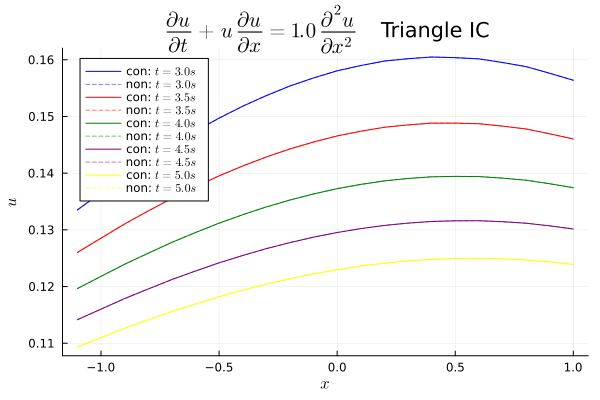

In [27]:
k = [100, 200, 300, 400, 500] .+ 501;
data1 = zeros(length(k), length(x));
data2 = zeros(length(k), length(x));
for i in 1:length(k)
    data1[i, :] = Matrix( CSV.read(data_path * "Burgers//explicit_bc1//$(IC_name[1])_$(nu_name[3]).csv", DataFrame) )[k[i], :];
    data2[i, :] = Matrix( CSV.read(data_path * "Burgers//explicit_bc1_conservation//$(IC_name[1])_$(nu_name[3]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x[90: 111], data1[i, :][90: 111],
        label="con: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=1,
        color=colors[i]
    )
    plot!(
        x[90: 111], data2[i, :][90: 111],
        label="non: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=1,
        color=colors[i],
        linestyle=:dash,
        alpha=0.5
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + u\\frac{\\partial u}{\\partial x}= $(c[3])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[1]) IC");

savefig(p, save_path * "Burgers//noncon_comparison_$(IC_name[1]).pdf");
plot(p)

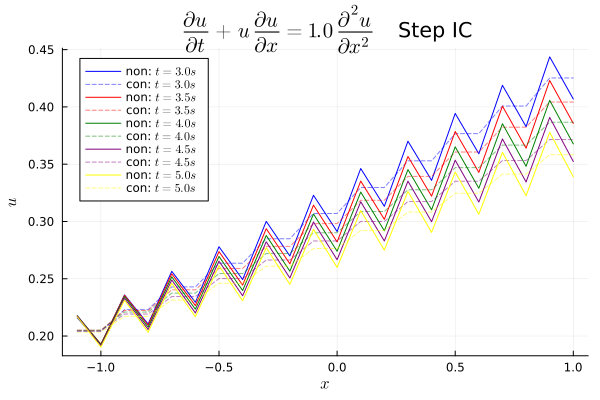

In [28]:
k = [100, 200, 300, 400, 500] .+ 501;
data1 = zeros(length(k), length(x));
data2 = zeros(length(k), length(x));
for i in 1:length(k)
    data1[i, :] = Matrix( CSV.read(data_path * "Burgers//explicit_bc1//$(IC_name[2])_$(nu_name[3]).csv", DataFrame) )[k[i], :];
    data2[i, :] = Matrix( CSV.read(data_path * "Burgers//explicit_bc1_conservation//$(IC_name[2])_$(nu_name[3]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x[90: 111], data1[i, :][90: 111],
        label="non: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=1,
        color=colors[i]
    )
    plot!(
        x[90: 111], data2[i, :][90: 111],
        label="con: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=1,
        color=colors[i],
        linestyle=:dash,
        alpha=0.5
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + u\\frac{\\partial u}{\\partial x}= $(c[3])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "Burgers//noncon_comparison_$(IC_name[2]).pdf");
plot(p)

## 显式与半隐式格式比较

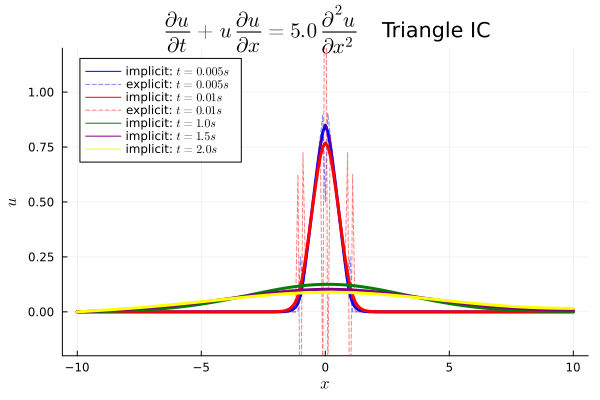

In [29]:
k = [1, 2, 200, 300, 400] .+ 1;
data1 = zeros(length(k), length(x));
data2 = zeros(length(k), length(x));
for i in 1:length(k)
    data1[i, :] = Matrix( CSV.read(data_path * "Burgers//implicit_bc1//$(IC_name[1])_$(nu_name[4]).csv", DataFrame) )[k[i], :];
    data2[i, :] = Matrix( CSV.read(data_path * "Burgers//explicit_bc1//$(IC_name[1])_$(nu_name[4]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data1[i, :],
        label="implicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=3,
        color=colors[i]
    )
    if i>2
        continue
    end
    plot!(
        x, data2[i, :],
        label="explicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=1,
        color=colors[i],
        linestyle=:dash,
        alpha=0.5,
        ylims=[-0.2, 1.2]
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t}+u\\frac{\\partial u}{\\partial x} = $(c[4])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[1]) IC");

savefig(p, save_path * "Burgers//bc1_ie_comparison_$(IC_name[1]).pdf");
plot(p)

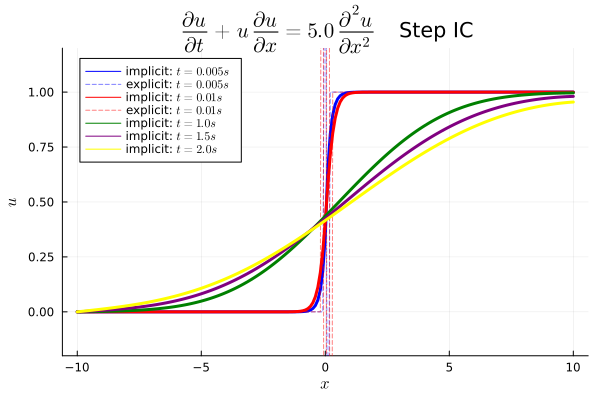

In [30]:
k = [1, 2, 200, 300, 400] .+ 1;
data1 = zeros(length(k), length(x));
data2 = zeros(length(k), length(x));
for i in 1:length(k)
    data1[i, :] = Matrix( CSV.read(data_path * "Burgers//implicit_bc1//$(IC_name[2])_$(nu_name[4]).csv", DataFrame) )[k[i], :];
    data2[i, :] = Matrix( CSV.read(data_path * "Burgers//explicit_bc1//$(IC_name[2])_$(nu_name[4]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data1[i, :],
        label="implicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=3,
        color=colors[i]
    )
    if i>2
        continue
    end
    plot!(
        x, data2[i, :],
        label="explicit: \$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=1,
        color=colors[i],
        linestyle=:dash,
        alpha=0.5,
        ylims=[-0.2, 1.2]
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t}+u\\frac{\\partial u}{\\partial x} = $(c[4])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "Burgers//bc1_ie_comparison_$(IC_name[2]).pdf");
plot(p)

## 第一类边界条件

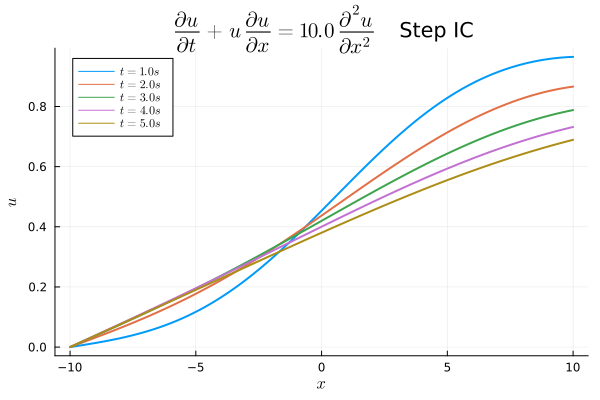

In [31]:
k = [200, 400, 600, 800, 1000] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "Burgers//implicit_bc1//$(IC_name[2])_$(nu_name[5]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=2
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + u\\frac{\\partial u}{\\partial x}= $(c[5])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "Burgers//evolution_bc1_$(IC_name[2]).pdf");
plot(p)

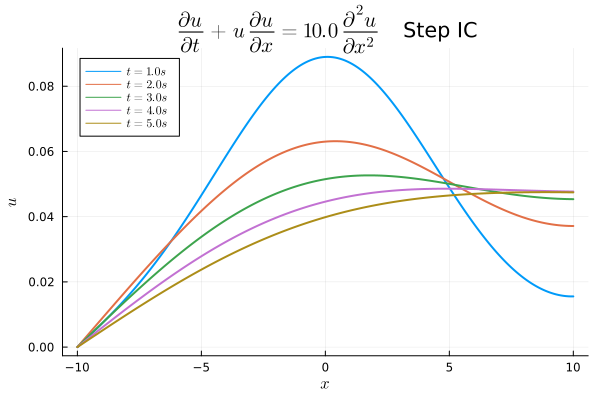

In [32]:
# k = [500, 600, 700, 800, 900, 1000] .+ 1;
data = zeros(length(k), length(x));
for i in 1:length(k)
    data[i, :] = Matrix( CSV.read(data_path * "Burgers//implicit_bc1//$(IC_name[1])_$(nu_name[5]).csv", DataFrame) )[k[i], :];
end

p = plot()
for i = 1:length(k)
    plot!(
        x, data[i, :],
        label="\$t=$(t[k[i]]) s\$",
        legend=:topleft,
        lw=2
    )
end
xlabel!("\$ x \$");
ylabel!("\$ u \$");
title!("\$ \\frac{\\partial u}{\\partial t} + u\\frac{\\partial u}{\\partial x}= $(c[5])\\frac{\\partial^2 u}{\\partial x^2}\\quad\$ $(IC_name[2]) IC");

savefig(p, save_path * "Burgers//evolution_bc1_$(IC_name[1]).pdf");
plot(p)